In [2]:
import numpy as np
import keras
import tensorflow as tf
import cv2

In [3]:
from keras.models import Sequential 
from keras.layers import Convolution2D,MaxPooling2D,Flatten,Dense


In [5]:
clf = Sequential()

In [9]:
clf.add(Convolution2D(128,3,3,input_shape = (64,64,3),activation = 'relu'))
clf.add(MaxPooling2D(pool_size = (2,2)))


E:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), input_shape=(64, 64, 3..., activation="relu")`
  """Entry point for launching an IPython kernel.


In [10]:
clf.add(Convolution2D(64,3,3,activation = 'relu'))
clf.add(MaxPooling2D(pool_size = (2,2)))

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  """Entry point for launching an IPython kernel.


In [11]:
clf.add(Flatten())

In [12]:
clf.add(Dense(output_dim = 12, activation = 'relu'))
clf.add(Dense(output_dim = 1, activation = 'sigmoid'))
clf.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=11)`
  """Entry point for launching an IPython kernel.
E:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1)`
  


In [13]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator(rescale=1./255,shear_range = 0.1, rotation_range = 90, zoom_range=[0.0,0.2],brightness_range = [0.0,0.2],vertical_flip = True,horizontal_flip = True)

In [14]:
test_datagen=ImageDataGenerator(rescale=1./255)
test_set = test_datagen.flow_from_directory('Datasets/Test_set',target_size=(64,64),class_mode='binary')

Found 39 images belonging to 2 classes.


In [ ]:
training_set=train_datagen.flow_from_directory('Datasets/Training_set',target_size=(64,64),batch_size=24,class_mode='binary')
clf.fit_generator(training_set, samples_per_epoch = 400, nb_epoch = 50, validation_data = test_set, nb_val_samples = 39)

Found 400 images belonging to 2 classes.


E:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  
E:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=<keras_pre..., steps_per_epoch=16, epochs=50, validation_steps=39)`
  


Epoch 1/50
16/16 [==============================] - 10s 614ms/step - loss: 0.6939 - acc: 0.4310 - val_loss: 0.6931 - val_acc: 0.5385
Epoch 2/50
16/16 [==============================] - 9s 582ms/step - loss: 0.6932 - acc: 0.4870 - val_loss: 0.6942 - val_acc: 0.4872
Epoch 3/50
16/16 [==============================] - 9s 545ms/step - loss: 0.6926 - acc: 0.4975 - val_loss: 0.7032 - val_acc: 0.4872
Epoch 4/50
16/16 [==============================] - 9s 575ms/step - loss: 0.6927 - acc: 0.5339 - val_loss: 0.7094 - val_acc: 0.4872
Epoch 5/50
16/16 [==============================] - 9s 545ms/step - loss: 0.6926 - acc: 0.5442 - val_loss: 0.6981 - val_acc: 0.4872
Epoch 6/50
16/16 [==============================] - 9s 559ms/step - loss: 0.6884 - acc: 0.5781 - val_loss: 0.8385 - val_acc: 0.4872
Epoch 7/50
16/16 [==============================] - 9s 563ms/step - loss: 0.6897 - acc: 0.5157 - val_loss: 0.6904 - val_acc: 0.5128
Epoch 8/50
16/16 [==============================] - 9s 592ms/step - loss: 0

In [15]:
clf.save('models/simple_CNN.h5')

NameError: name 'training_set' is not defined

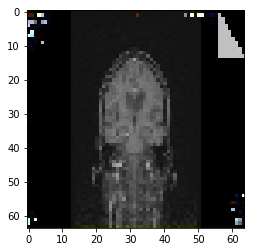

In [16]:
from keras.preprocessing import image
import matplotlib.pyplot as plt
#predicting for Sir sunderlal data
testimage2 = image.load_img('Datasets/2190A8D3.png', target_size = (64,64))
testimage2 = image.img_to_array(testimage2)
plt.imshow(testimage2/255.)
testimage2 = np.expand_dims(testimage2, axis = 0)
result = clf.predict(testimage2)
training_set.class_indices
if result[0][0] <= 0.5:
    prediction = 'You have Alzheimer'
else:
    prediction = 'You are healthy'
print(prediction)